## Advertising for Better Sales
<br>

### Problem Statement-

The company 'X' wants to generate advertisement about company's new product. However, the marketing team are confused and they don't know where they should place the advertisement. The company wishes, the ads can increase product sales. To solve the problem, they need to analyze their advertising historical data. From the data that have been collected, they've got data about the platform where the company puts its ads prior, and how much sales they've got. Company X usually place advertisements through radio, television and newspaper. 

### Questions

1. Among tv, radio and magazines, which platform is the most effective for placing ads and increasing revenue?
2. Where companies can put their ads?
3. Which advertising platform has the strongest correlation with sales?

### Initial import statements

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8,6
sns.set_theme(style="whitegrid", palette="pastel")

In [122]:
#importing dataset
ads = pd.read_csv("Advertising.csv")
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### About dataset

In [123]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [124]:
ads.shape

(200, 5)

### Data Cleaning

In [125]:
# Delete uneccesary column
ads = ads.drop(columns=['Unnamed: 0'])

In [126]:
# Checking null values
ads.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [127]:
# Delete duplicates
ads.drop_duplicates(keep=False)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


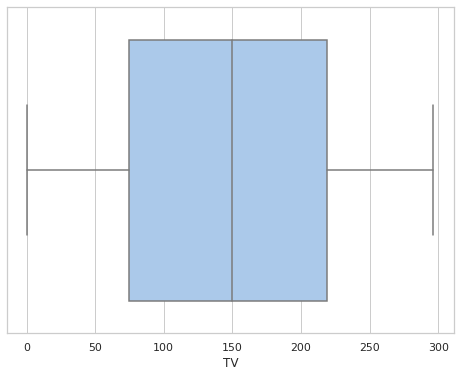

In [128]:
# Checking for outliers
sns.boxplot(x=ads["TV"])

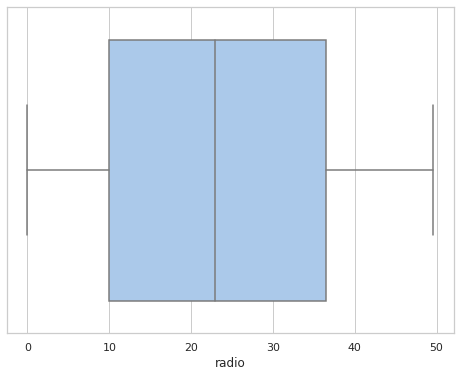

In [129]:
# Checking for outliers
sns.boxplot(x=ads["radio"])

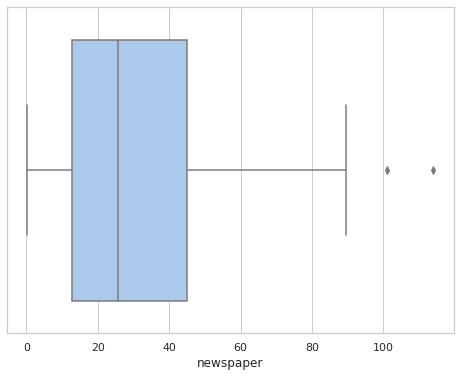

In [130]:
# Checking for outliers
sns.boxplot(x=ads["newspaper"])

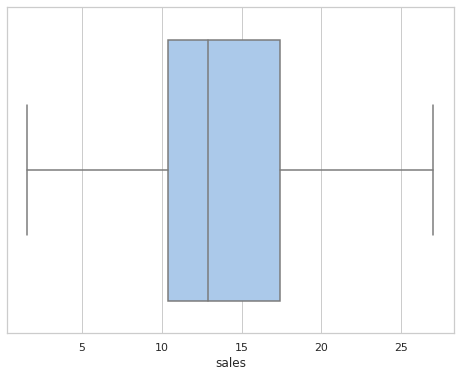

In [131]:
# Checking for outliers
sns.boxplot(x=ads["sales"])

In [132]:
ads_long = ads.copy()
ads_long = pd.melt(ads_long)
ads_long.head()

,variable,value
0,TV,230.1
1,TV,44.5
2,TV,17.2
3,TV,151.5
4,TV,180.8


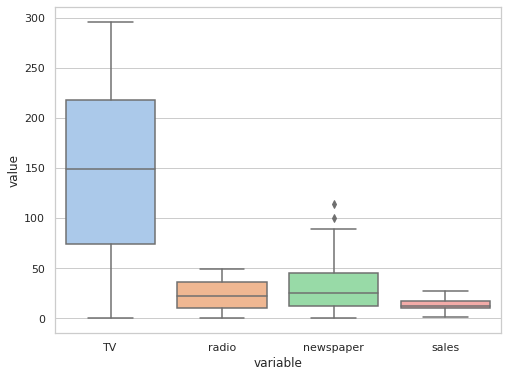

In [133]:
#create seaborn boxplots by group
sns.boxplot(x='variable', y='value', data=ads_long)

## Analysis

In [134]:
# Describe dataset statistical calculation
ads.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Finding correlation between numerical data

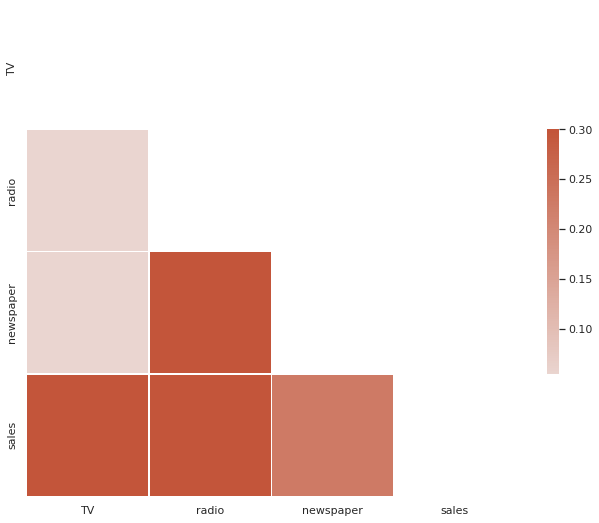

In [135]:
# Compute the correlation matrix
corr = ads.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


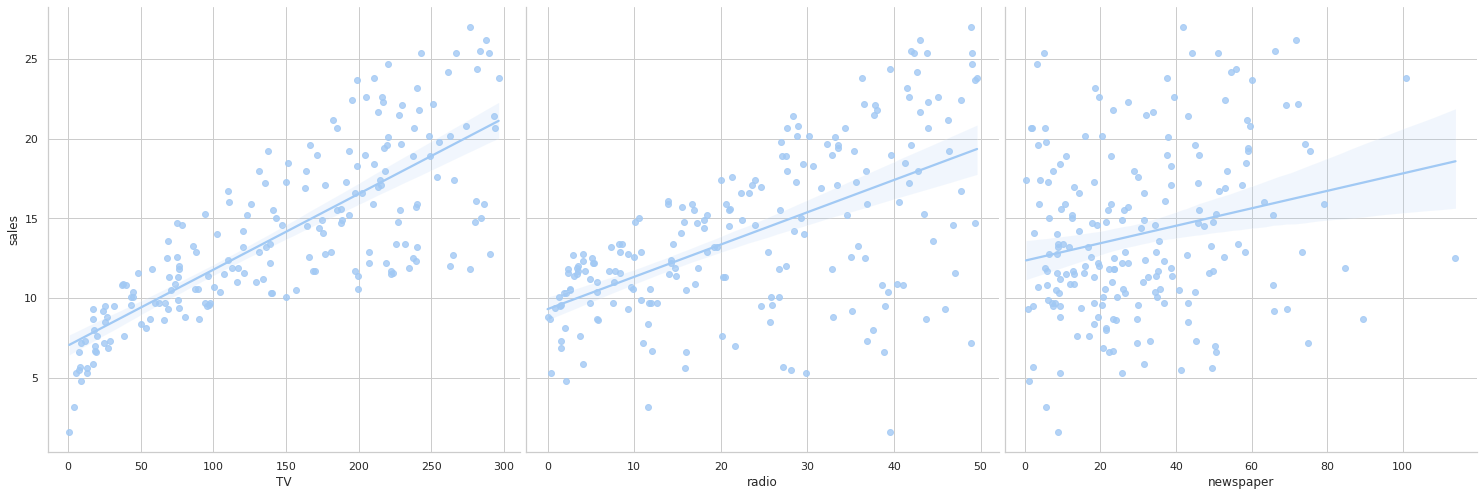

In [136]:
sns.pairplot(ads, x_vars = ['TV','radio','newspaper'], y_vars='sales',size=7, kind='reg')

For answering question number 3, Which advertising platform has the strongest correlation with sales? We can see from the correlation plot above, the television is highly positively correlated with sales. However, radio is slighly positively correlated and newspaper is weakly correlated. So we can conclude that among tv, radio, and newspaper, tv is the most effective platform for placing ads and increasing revenue, radio also the second choice. TV and radio is more effective than newspaper. So it is highly recommended to place the ads in tv and radio, and not recommended to place the ads inside newspaper.